## Detalle sobre este notebook (fv_iteraperiodos_para_max_betweenness):
* **OBJETIVO:** Dado un aspecto y un % de nodos a considerar, se itera en los períodos 14 al 21, y se informa el período en que el betweenness es máximo

#### Librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from networkx.algorithms import community
import community as community_louvain


#### Cargar df_5_extended

In [2]:
df_5_extended = pd.read_excel('df_5_extended.xlsx')
df_5_extended.head()

countryname  ventana_5    per101   per102    per103    per104    per105  \
0     Albania         15  3.113815  0.00000  1.559835  2.046771  0.331285   
1     Albania         16  3.716797  0.00000  0.051879  3.519091  0.015910   
2     Albania         17  2.392570  0.00000  0.000000  2.757403  0.026619   
3   Argentina         14  0.000000  0.00000  4.619213  0.448618  0.828036   
4   Argentina         16  0.254185  0.02014  0.725611  1.406834  0.100835   

     per106    per107    per108  ...  per606_1  per606_2  per607_1  per607_2  \
0  1.674371  4.632186  5.169904  ...  0.000000       0.0  0.000000       0.0   
1  0.579077  4.971347  1.981720  ...  0.000000       0.0  0.000000       0.0   
2  0.023948  3.523162  1.452779  ...  0.000000       0.0  0.000000       0.0   
3  0.338070  2.955090  0.000000  ...  7.595332       0.0  0.326532       0.0   
4  1.720736  5.478894  3.932102  ...  4.494125       0.0  0.443809       0.0   

   per607_3  per608_1  per608_2  per608_3  per703_1  per703_2  
0  0.000000       0.0       0.0       0.0  0.000000       0.0  
1  0.000000       0.0       0.0       0.0  0.000000       0.0  
2  0.000000       0.0       0.0       0.0  0.000000       0.0  
3  0.000000       0.0       0.0       0.0  2.495280       0.0  
4  0.809128       0.0       0.0       0.0  2.573783       0.0  

[5 rows x 144 columns]

In [3]:
df_5_extended.shape

(1407, 144)

In [4]:
# cargar Analytical_Data
df_AD = pd.read_excel('data/Analytical_Data.xlsx')
df_AD.head()


Dominio      Nombre_Dominio Variable_per  \
0  Domain_1  External Relations       per101   
1  Domain_1  External Relations       per102   
2  Domain_1  External Relations       per103   
3  Domain_1  External Relations       per104   
4  Domain_1  External Relations       per105   

                           Detalle_Dominio  
0  Foreign Special Relationships: Positive  
1  Foreign Special Relationships: Negative  
2                         Anti-Imperialism  
3                       Military: Positive  
4                       Military: Negative

In [5]:
all_per_variables = [col for col in df_5_extended.columns if col.startswith('per')]
all_per_variables

['per101',
 'per102',
 'per103',
 'per104',
 'per105',
 'per106',
 'per107',
 'per108',
 'per109',
 'per110',
 'per201',
 'per202',
 'per203',
 'per204',
 'per301',
 'per302',
 'per303',
 'per304',
 'per305',
 'per401',
 'per402',
 'per403',
 'per404',
 'per405',
 'per406',
 'per407',
 'per408',
 'per409',
 'per410',
 'per411',
 'per412',
 'per413',
 'per414',
 'per415',
 'per416',
 'per501',
 'per502',
 'per503',
 'per504',
 'per505',
 'per506',
 'per507',
 'per601',
 'per602',
 'per603',
 'per604',
 'per605',
 'per606',
 'per607',
 'per608',
 'per701',
 'per702',
 'per703',
 'per704',
 'per705',
 'per706',
 'per1011',
 'per1012',
 'per1013',
 'per1014',
 'per1015',
 'per1016',
 'per1021',
 'per1022',
 'per1023',
 'per1024',
 'per1025',
 'per1026',
 'per1031',
 'per1032',
 'per1033',
 'per2021',
 'per2022',
 'per2023',
 'per2031',
 'per2032',
 'per2033',
 'per2041',
 'per3011',
 'per3051',
 'per3052',
 'per3053',
 'per3054',
 'per3055',
 'per4011',
 'per4012',
 'per4013',
 'per4014',


In [6]:
len(all_per_variables)

142

### MATRIZ DE ASPECTOS

In [19]:
# Crear el DataFrame 'df_aspectos' con los aspectos y las variables asociadas
data_aspectos = {
    'aspecto': ['CRISIS_FINANCIERA_2008'],
    'var_1': ['per401'],
    'var_2': ['per403'],
    'var_3': ['per503'],  # None indica que no hay una tercera variable para el aspecto
    'var_4': ['per504']  
}

df_aspectos = pd.DataFrame(data_aspectos)

# Mostrar el DataFrame 'df_aspectos' para verificar su contenido
display(df_aspectos)

aspecto   var_1   var_2   var_3   var_4
0  CRISIS_FINANCIERA_2008  per401  per403  per503  per504

#### Años en cada período

In [20]:
# cargar períodos
df_ventana_5 = pd.read_excel('data/Ventana_5.xlsx')
df_ventana_5

agno  ventana
0    1920        1
1    1921        1
2    1922        1
3    1923        1
4    1924        1
..    ...      ...
99   2019       20
100  2020       21
101  2021       21
102  2022       21
103  2023       21

[104 rows x 2 columns]

#### Calculamos la similaridad tanto con correlación como con distancia euclideana

In [21]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import community
import seaborn as sns
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from scipy.spatial.distance import euclidean
from scipy.stats import spearmanr
from collections import defaultdict
import itertools


In [22]:
def calcular_similitudes_todos_paises(df, df_aspectos, tipo_similitud, periodo):
    """Calcula la similaridad entre todos los países para un aspecto específico y un período usando Pearson o Euclidean."""
    similarity_results = defaultdict(list)

    # Filtrar el dataframe para el período específico
    df = df[df['ventana_5'] == periodo]
    
    for _, row_aspecto in df_aspectos.iterrows():
        aspecto = row_aspecto['aspecto']
        variables = row_aspecto[['var_1', 'var_2', 'var_3', 'var_4']].dropna().tolist()

        # Filtrar datos de todos los países con las columnas relevantes
        columnas_relevantes = ['countryname', 'ventana_5'] + variables
        df_filtered = df[columnas_relevantes].copy()

        # Calcular similitudes entre todos los pares de países
        for (idx1, row1), (idx2, row2) in itertools.combinations(df_filtered.iterrows(), 2):
            country_period_1 = f"{row1['countryname']}_{row1['ventana_5']}"
            country_data_1 = row1[variables].astype(float)

            country_period_2 = f"{row2['countryname']}_{row2['ventana_5']}"
            country_data_2 = row2[variables].astype(float)

            # Asignar similaridad de cero si uno de los países tiene todos los valores en cero
            if country_data_1.sum() == 0 or country_data_2.sum() == 0:
                similarity = 0  
            else:
                if tipo_similitud == 'pearson':
                    # Calcular la correlación de Pearson
                    corr = country_data_1.corr(country_data_2, method='pearson')
                    # print(f"Pearson/ {aspecto} / {country_period_1} / {country_period_2} / {corr}")
                    similarity = 0 if pd.isna(corr) else abs(corr)
                elif tipo_similitud == 'euclidean':
                    dist = euclidean(country_data_1, country_data_2)
                    similarity = 1 / (1 + dist) if not np.isnan(dist) else 0

            similarity_results[(aspecto, country_period_1, country_period_2)].append(similarity)

    # Convertir a DataFrame
    final_results = {
        key: np.mean(values) for key, values in similarity_results.items()
    }

    df_similarities = pd.DataFrame(
        list(final_results.items()), 
        columns=['Aspecto_Country_Period1_Period2', 'Similarity']
    )
    df_similarities[['Aspecto', 'Country_Period_1', 'Country_Period_2']] = pd.DataFrame(
        df_similarities['Aspecto_Country_Period1_Period2'].tolist(), index=df_similarities.index
    )
    df_similarities.drop('Aspecto_Country_Period1_Period2', axis=1, inplace=True)

    # Eliminar duplicados
    df_similarities = df_similarities.groupby(['Country_Period_1', 'Country_Period_2'], as_index=False).agg({'Similarity': 'mean'})
    
    return df_similarities


#### Generamos las Redes, Comunidades y Métricas de Centralidad

In [23]:
def generar_red_y_calcular_metricas(df_similarity, aspecto, tipo_similitud, porcentaje, periodo):
    """
    Genera una red de similaridad, calcula las métricas de centralidad, 
    y analiza las comunidades detectadas para un aspecto específico.
    """
    resumen = {'Aspecto': aspecto, 'Criterio': tipo_similitud}
    
    # Obtener los años "Desde" y "Hasta" para el período dado
    desde_hasta_df = df_ventana_5[df_ventana_5['ventana'] == periodo]
    desde = desde_hasta_df['agno'].min()
    hasta = desde_hasta_df['agno'].max()
    
    # Filtrar los x% enlaces con mayor similaridad
    df_similarity = df_similarity.sort_values(by='Similarity', ascending=False)
    top_x_percent = int(len(df_similarity) * (porcentaje / 100))
    df_top_similarity = df_similarity.head(top_x_percent)

    # Redondear la similaridad a 4 decimales
    df_top_similarity['Similarity'] = df_top_similarity['Similarity'].round(4)
    
    # Crear el grafo
    G = nx.Graph()
    for _, row in df_top_similarity.iterrows():
        nodo_1 = row['Country_Period_1']
        nodo_2 = row['Country_Period_2']
        G.add_edge(nodo_1, nodo_2, weight=row['Similarity'])
    
    # Configuración de colores de los enlaces según la fuerza del enlace
    weights = nx.get_edge_attributes(G, 'weight').values()
    norm = plt.Normalize(vmin=min(weights), vmax=max(weights))
    colors = [cm.coolwarm(norm(weight)) for weight in weights]

    # Visualización de la red de similaridad
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, k=0.5, seed=42)
    nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, edge_color=colors, width=2)
    nx.draw_networkx_labels(G, pos, font_size=8)
    plt.title(f'Red de Similitud - {aspecto}\nPeríodo {periodo} ({desde}-{hasta}) ({porcentaje}% enlaces más fuertes) - {tipo_similitud}')
    sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
    sm.set_array([])
    plt.colorbar(sm, label='Fuerza del Enlace')
    plt.show()

    # Clustering y cálculo de métricas de centralidad
    partition = community.louvain_communities(G, weight='weight')
    resumen['Num_Comunidades'] = len(partition)
    print(f"Se identificaron {resumen['Num_Comunidades']} clusters para el aspecto '{aspecto}'.")

    # Visualización del gráfico de comunidades
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)
    colors = cm.rainbow(np.linspace(0, 1, resumen['Num_Comunidades']))  # Colores para cada comunidad
    for i, comm in enumerate(partition):
        nx.draw_networkx_nodes(G, pos, nodelist=list(comm), node_size=300, node_color=[colors[i]], label=f'Comunidad {i}')
    nx.draw_networkx_edges(G, pos, edge_color='gray', width=2)
    nx.draw_networkx_labels(G, pos, font_size=8)
    plt.title(f'Comunidades detectadas - {aspecto}\nPeríodo {periodo} ({desde}-{hasta}) ({porcentaje}% enlaces más fuertes) - {tipo_similitud}')
    sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
    sm.set_array([])
    plt.colorbar(sm, label='Fuerza del Enlace')
    plt.legend(loc="best")
    plt.show()

    # Cálculo de métricas de centralidad
    degree = nx.degree_centrality(G)
    betweenness = nx.betweenness_centrality(G, weight='weight')
    closeness = nx.closeness_centrality(G)
    eigenvector = nx.eigenvector_centrality(G, max_iter=1000)

    # Resumen de centralidades
    centralities = pd.DataFrame({
        'Nodo': list(degree.keys()),
        'Degree_Centrality': list(degree.values()),
        'Betweenness_Centrality': list(betweenness.values()),
        'Closeness_Centrality': list(closeness.values()),
        'Eigenvector_Centrality': list(eigenvector.values())
    })
    
    # Mostrar los top 10 nodos por Betweenness Centrality
    top_betweenness = centralities[['Nodo', 'Betweenness_Centrality']].sort_values(by='Betweenness_Centrality', ascending=False).head(10)
    top_betweenness = top_betweenness.round(4)  # Limitar a 4 decimales
    print(f"\n PERÍODO: {periodo}, % Nodos: {porcentaje} \n ASPECTO: {aspecto}\nTop 10 nodos según Betweenness Centrality:")
    display(top_betweenness)

    # Calcular estadísticas y agregar al resumen
    resumen['Num_Paises'] = len(centralities)
    for metric in ['Degree_Centrality', 'Betweenness_Centrality', 'Closeness_Centrality', 'Eigenvector_Centrality']:
        resumen[f'Promedio_{metric}'] = round(centralities[metric].mean(), 4)
        resumen[f'Std_{metric}'] = round(centralities[metric].std(), 4)
        resumen[f'Max_{metric}'] = round(centralities[metric].max(), 4)

    return resumen, centralities


#### Ejecución


=== Análisis para el período: 14 ===


--- Analizando aspecto: CRISIS_FINANCIERA_2008 ---



/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_8233/2914310538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_similarity['Similarity'] = df_top_similarity['Similarity'].round(4)
/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_8233/2914310538.py:42: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Fuerza del Enlace')


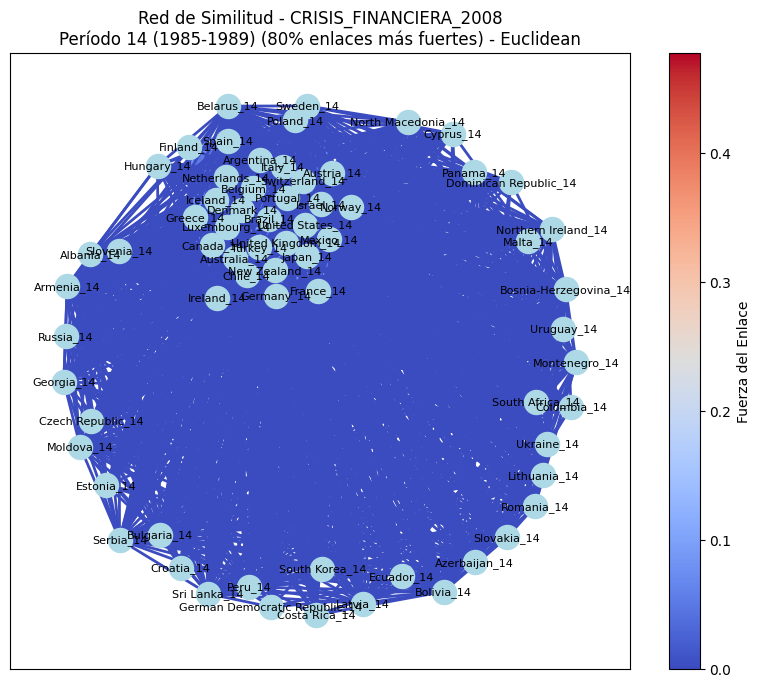

Se identificaron 40 clusters para el aspecto 'CRISIS_FINANCIERA_2008'.


/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_8233/2914310538.py:61: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Fuerza del Enlace')


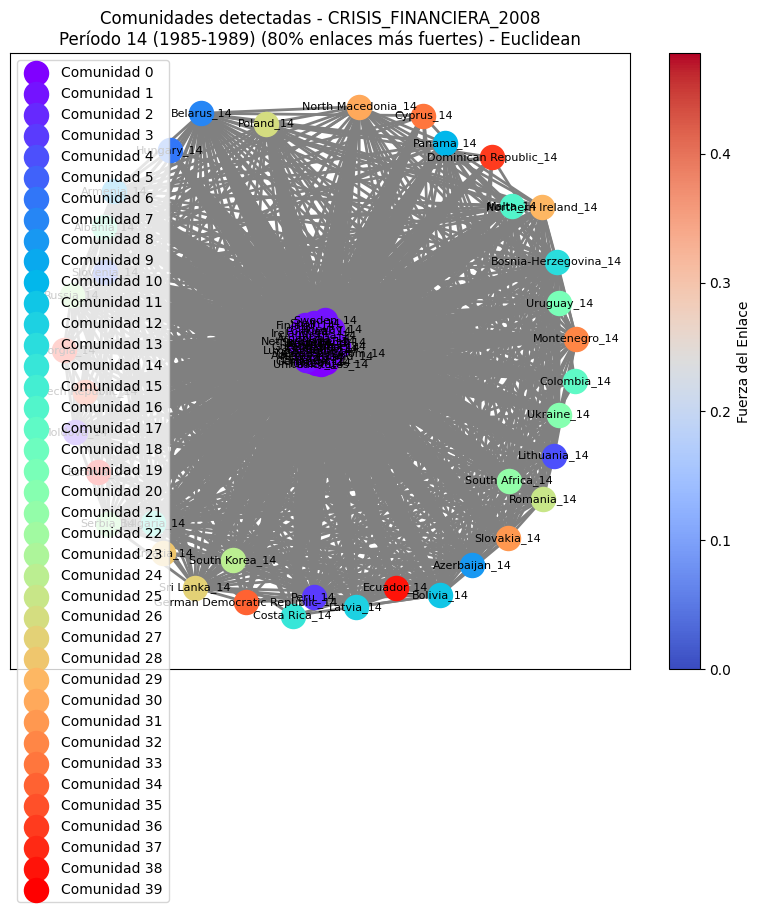


 PERÍODO: 14, % Nodos: 80 
 ASPECTO: CRISIS_FINANCIERA_2008
Top 10 nodos según Betweenness Centrality:


Nodo  Betweenness_Centrality
19              Mexico_14            1.265611e+13
40  Bosnia-Herzegovina_14            1.227819e+13
3           Luxembourg_14            1.209127e+13
28             Ireland_14            1.111173e+13
5              Iceland_14            1.111173e+13
6                Japan_14            1.111155e+13
17              Israel_14            1.102588e+13
12               Italy_14            1.089967e+13
27              Sweden_14            1.089964e+13
1          Switzerland_14            1.084292e+13


=== Análisis para el período: 15 ===


--- Analizando aspecto: CRISIS_FINANCIERA_2008 ---



/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_8233/2914310538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_similarity['Similarity'] = df_top_similarity['Similarity'].round(4)
/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_8233/2914310538.py:42: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Fuerza del Enlace')


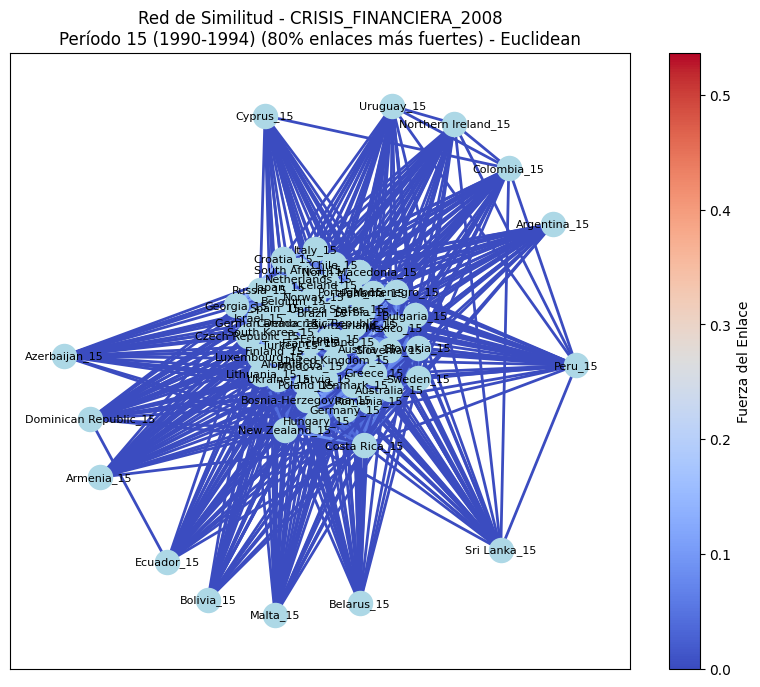

Se identificaron 18 clusters para el aspecto 'CRISIS_FINANCIERA_2008'.


/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_8233/2914310538.py:61: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Fuerza del Enlace')


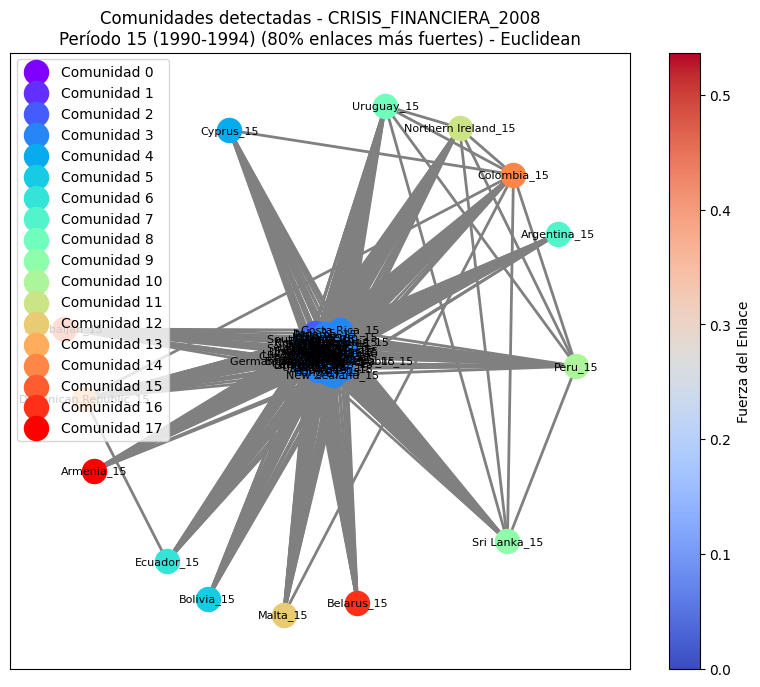


 PERÍODO: 15, % Nodos: 80 
 ASPECTO: CRISIS_FINANCIERA_2008
Top 10 nodos según Betweenness Centrality:


Nodo  Betweenness_Centrality
58           Sri Lanka_15            1.825197e+07
57             Uruguay_15            1.799414e+07
59                Peru_15            1.203011e+07
60    Northern Ireland_15            1.007571e+07
63            Colombia_15            9.817811e+06
55             Ecuador_15            6.103010e+06
62  Dominican Republic_15            3.892167e+06
61               Malta_15            3.782735e+06
53              Cyprus_15            2.818289e+06
56           Argentina_15            2.413963e+06


=== Análisis para el período: 16 ===


--- Analizando aspecto: CRISIS_FINANCIERA_2008 ---



/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_8233/2914310538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_similarity['Similarity'] = df_top_similarity['Similarity'].round(4)
/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_8233/2914310538.py:42: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Fuerza del Enlace')


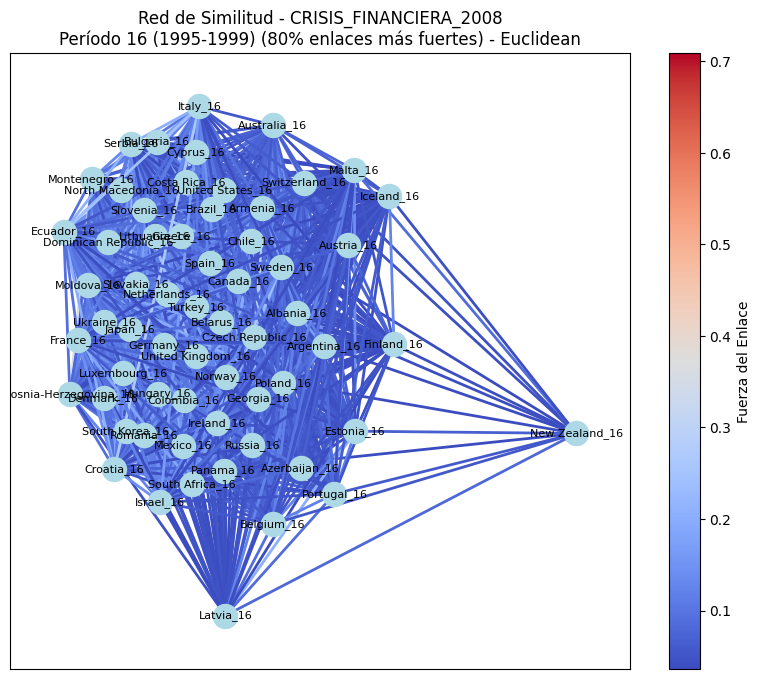

Se identificaron 4 clusters para el aspecto 'CRISIS_FINANCIERA_2008'.


/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_8233/2914310538.py:61: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Fuerza del Enlace')


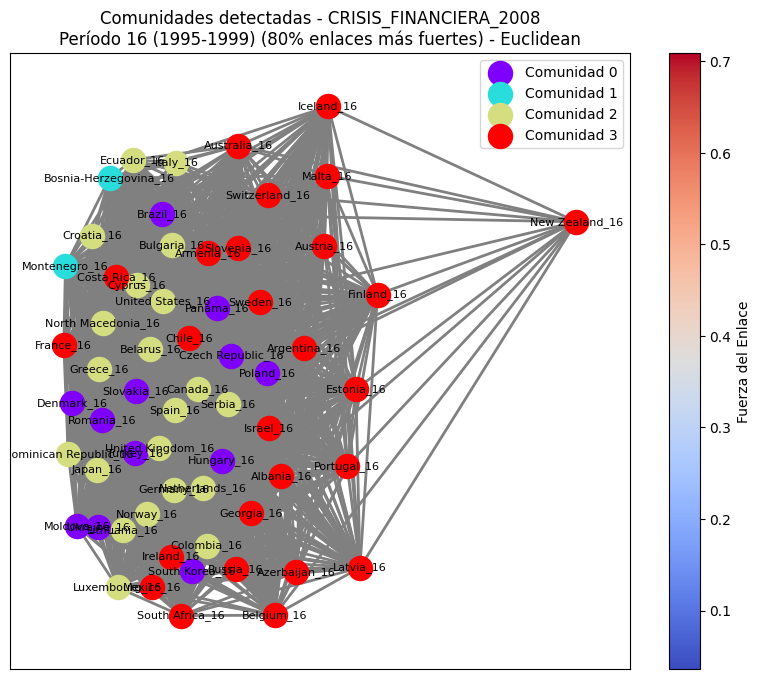


 PERÍODO: 16, % Nodos: 80 
 ASPECTO: CRISIS_FINANCIERA_2008
Top 10 nodos según Betweenness Centrality:


Nodo  Betweenness_Centrality
57      Iceland_16                  0.2873
49       Latvia_16                  0.1709
56      Finland_16                  0.1607
53        Malta_16                  0.0251
48      Estonia_16                  0.0203
59  New Zealand_16                  0.0158
54     Portugal_16                  0.0040
6      Colombia_16                  0.0028
58   Azerbaijan_16                  0.0017
34  Switzerland_16                  0.0017


=== Análisis para el período: 17 ===


--- Analizando aspecto: CRISIS_FINANCIERA_2008 ---



/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_8233/2914310538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_similarity['Similarity'] = df_top_similarity['Similarity'].round(4)
/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_8233/2914310538.py:42: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Fuerza del Enlace')


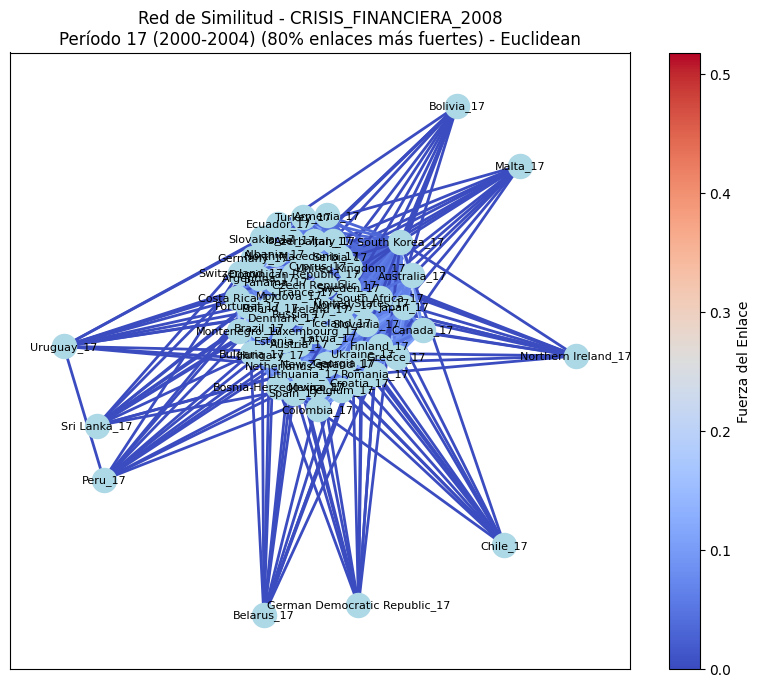

Se identificaron 13 clusters para el aspecto 'CRISIS_FINANCIERA_2008'.


/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_8233/2914310538.py:61: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Fuerza del Enlace')


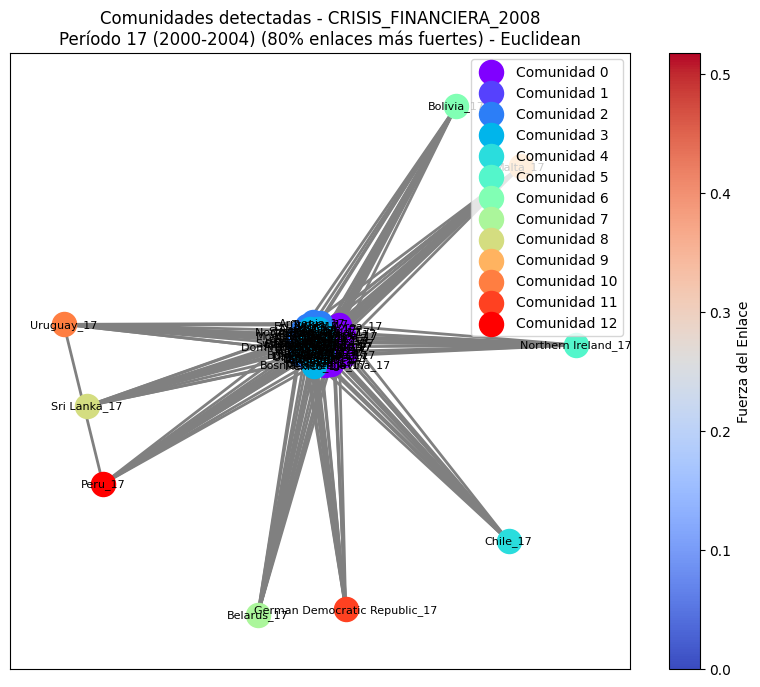


 PERÍODO: 17, % Nodos: 80 
 ASPECTO: CRISIS_FINANCIERA_2008
Top 10 nodos según Betweenness Centrality:


Nodo  Betweenness_Centrality
61                     Belarus_17                600.4382
60                     Bolivia_17                600.4364
58                       Chile_17                592.6991
65  German Democratic Republic_17                499.2933
64                     Uruguay_17                164.1168
59            Northern Ireland_17                137.9540
63                       Malta_17                137.9537
62                   Sri Lanka_17                132.5495
66                        Peru_17                125.3353
53                 South Korea_17                  2.1951


=== Análisis para el período: 18 ===


--- Analizando aspecto: CRISIS_FINANCIERA_2008 ---



/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_8233/2914310538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_similarity['Similarity'] = df_top_similarity['Similarity'].round(4)
/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_8233/2914310538.py:42: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Fuerza del Enlace')


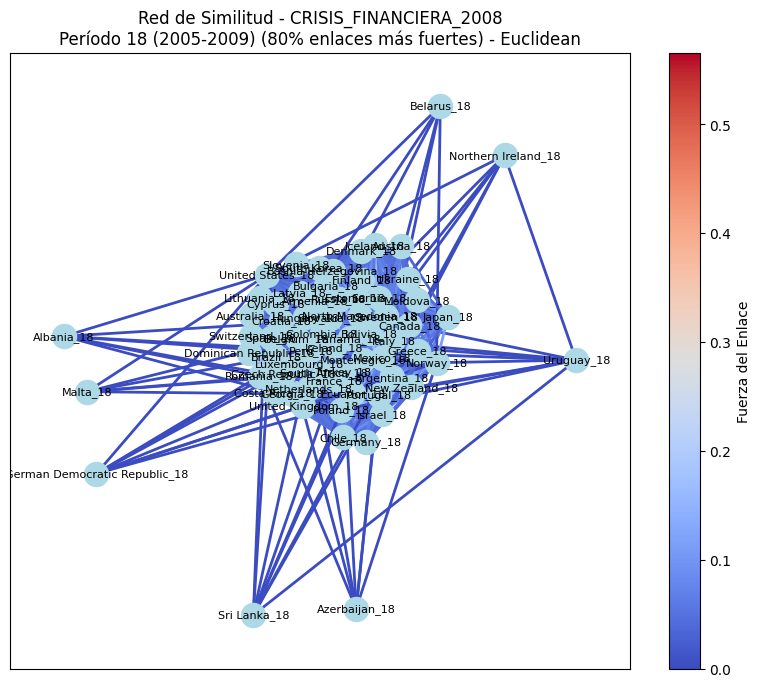

Se identificaron 11 clusters para el aspecto 'CRISIS_FINANCIERA_2008'.


/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_8233/2914310538.py:61: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Fuerza del Enlace')


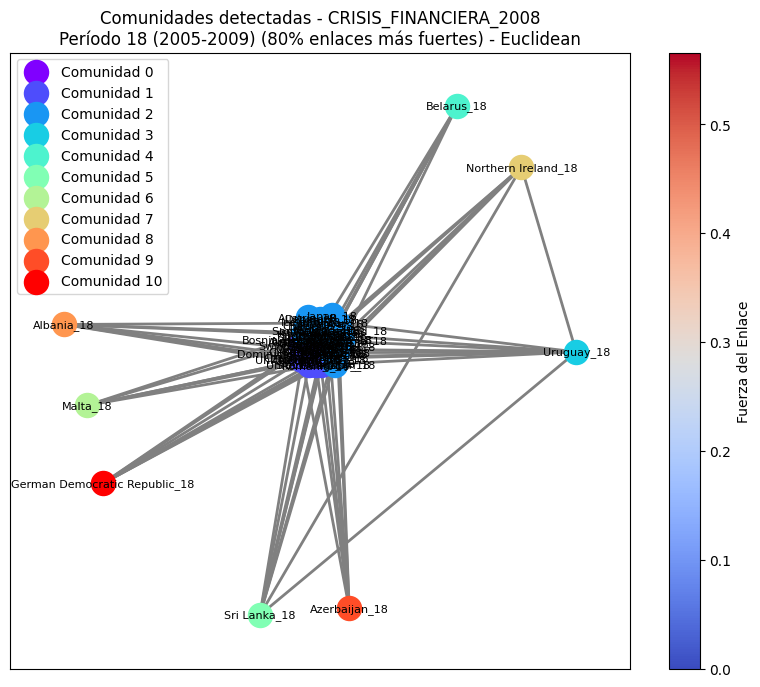


 PERÍODO: 18, % Nodos: 80 
 ASPECTO: CRISIS_FINANCIERA_2008
Top 10 nodos según Betweenness Centrality:


Nodo  Betweenness_Centrality
59                     Uruguay_18                 60.3279
61                   Sri Lanka_18                 16.4096
63            Northern Ireland_18                  3.8897
66  German Democratic Republic_18                  3.3919
64                     Albania_18                  2.3914
65                  Azerbaijan_18                  1.9960
60                     Belarus_18                  1.5177
62                       Malta_18                  1.1435
39                    Portugal_18                  0.9820
52                      Norway_18                  0.8114


=== Análisis para el período: 19 ===


--- Analizando aspecto: CRISIS_FINANCIERA_2008 ---



/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_8233/2914310538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_similarity['Similarity'] = df_top_similarity['Similarity'].round(4)
/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_8233/2914310538.py:42: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Fuerza del Enlace')


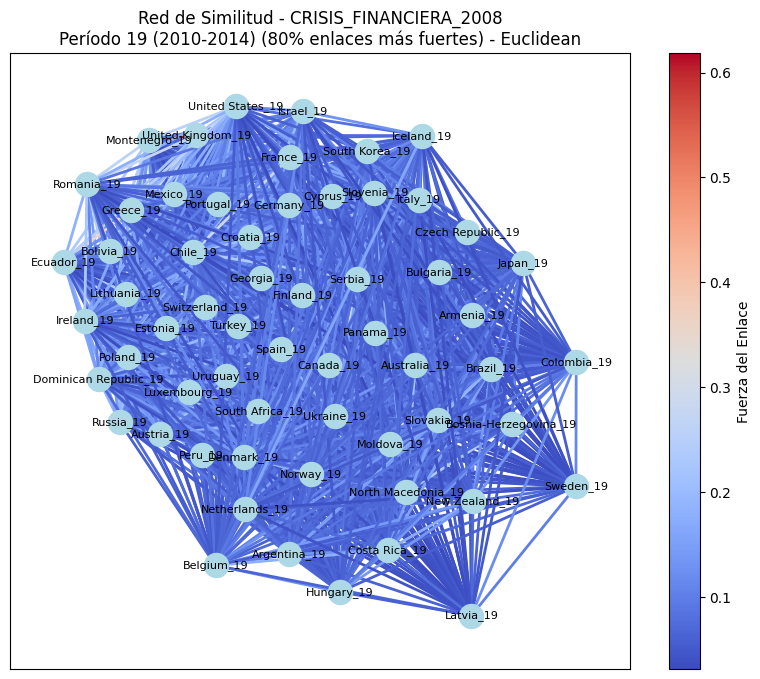

Se identificaron 4 clusters para el aspecto 'CRISIS_FINANCIERA_2008'.


/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_8233/2914310538.py:61: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Fuerza del Enlace')


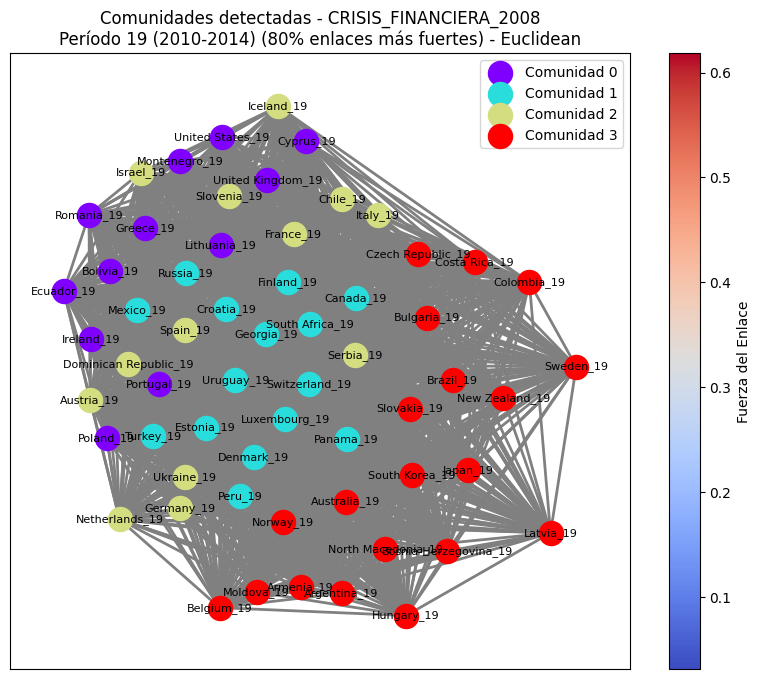


 PERÍODO: 19, % Nodos: 80 
 ASPECTO: CRISIS_FINANCIERA_2008
Top 10 nodos según Betweenness Centrality:


Nodo  Betweenness_Centrality
58         Latvia_19                  0.4912
59         Sweden_19                  0.1067
31         Cyprus_19                  0.0091
36        Romania_19                  0.0050
37  United States_19                  0.0023
57          Japan_19                  0.0000
43         Brazil_19                  0.0000
32          Chile_19                  0.0000
33         France_19                  0.0000
34         Serbia_19                  0.0000


=== Análisis para el período: 20 ===


--- Analizando aspecto: CRISIS_FINANCIERA_2008 ---



/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_8233/2914310538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_similarity['Similarity'] = df_top_similarity['Similarity'].round(4)
/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_8233/2914310538.py:42: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Fuerza del Enlace')


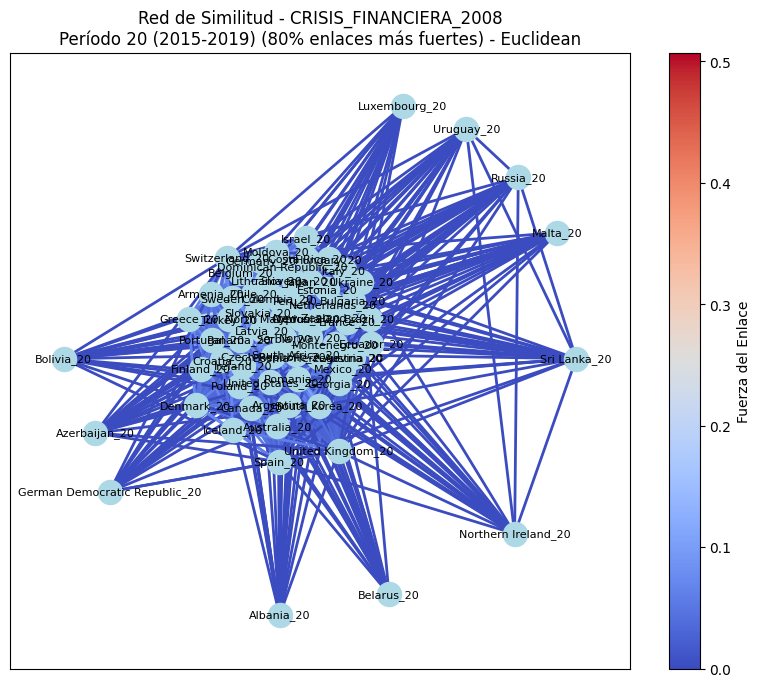

Se identificaron 13 clusters para el aspecto 'CRISIS_FINANCIERA_2008'.


/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_8233/2914310538.py:61: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Fuerza del Enlace')


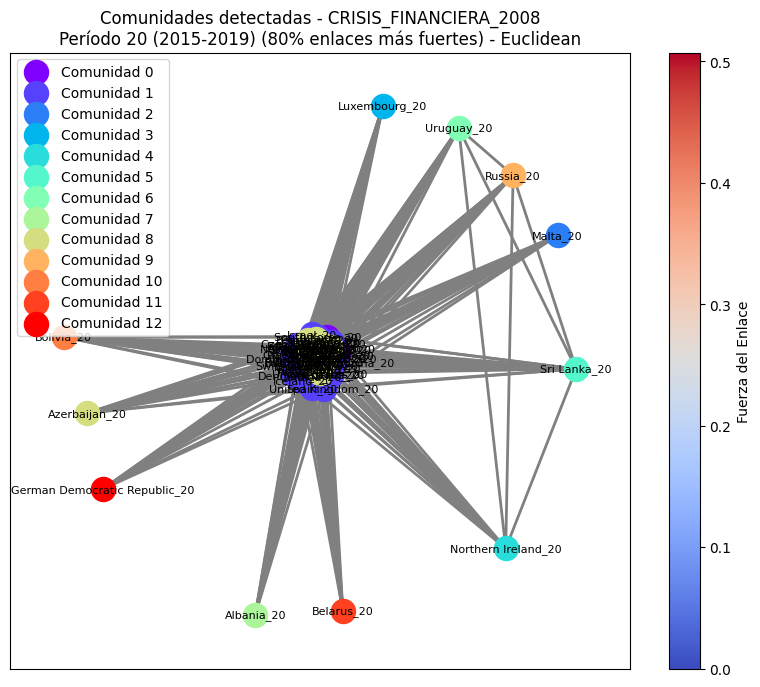


 PERÍODO: 20, % Nodos: 80 
 ASPECTO: CRISIS_FINANCIERA_2008
Top 10 nodos según Betweenness Centrality:


Nodo  Betweenness_Centrality
59                   Sri Lanka_20             107276.1260
63                      Russia_20              90605.2136
60                     Uruguay_20              87758.5896
58            Northern Ireland_20              82271.2870
56                       Malta_20              31526.9615
57                  Luxembourg_20              26291.3231
66  German Democratic Republic_20              26291.3197
61                     Albania_20              26291.3191
62                  Azerbaijan_20              26291.3171
65                     Belarus_20              26291.3165


=== Análisis para el período: 21 ===


--- Analizando aspecto: CRISIS_FINANCIERA_2008 ---



/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_8233/2914310538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_similarity['Similarity'] = df_top_similarity['Similarity'].round(4)
/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_8233/2914310538.py:42: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Fuerza del Enlace')


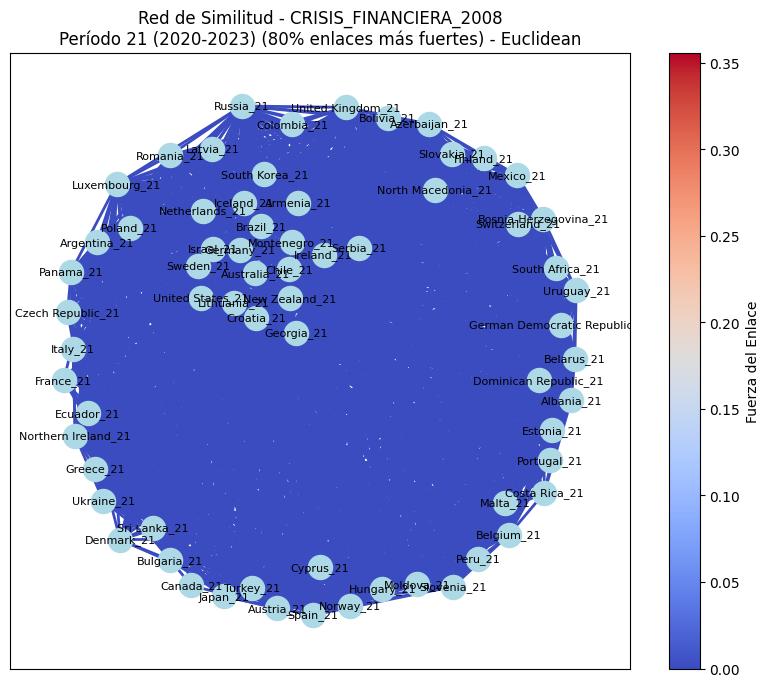

Se identificaron 51 clusters para el aspecto 'CRISIS_FINANCIERA_2008'.


/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_8233/2914310538.py:61: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Fuerza del Enlace')


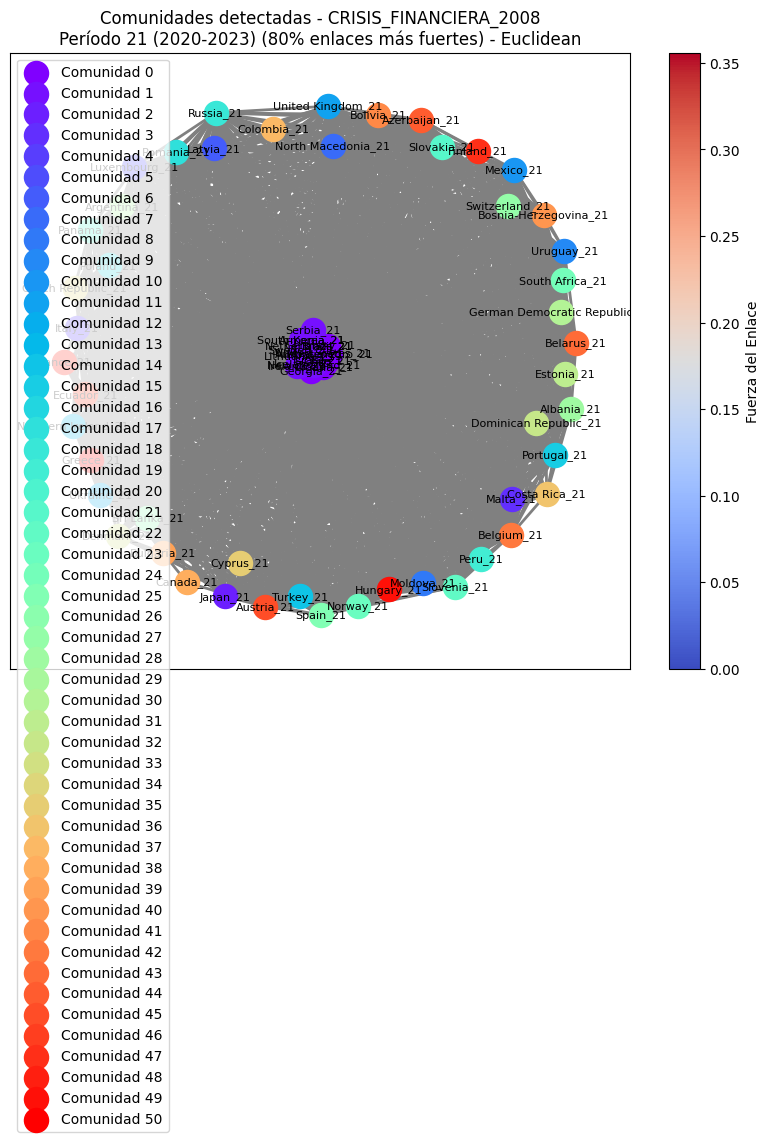


 PERÍODO: 21, % Nodos: 80 
 ASPECTO: CRISIS_FINANCIERA_2008
Top 10 nodos según Betweenness Centrality:


Nodo  Betweenness_Centrality
13       Israel_21            9.060207e+15
2     Lithuania_21            8.454640e+15
4       Germany_21            8.445872e+15
9       Ireland_21            8.442373e+15
8       Iceland_21            8.442148e+15
17       Serbia_21            8.441955e+15
3        Sweden_21            8.441927e+15
16  South Korea_21            8.441927e+15
5   Netherlands_21            8.441927e+15
1    Montenegro_21            8.441922e+15




RESUMEN DE CENTRALIDADES
Período con el máximo promedio de Betweenness Centrality:
Periodo                            2.100000e+01
Promedio_Betweenness_Centrality    1.663873e+15
Name: 7, dtype: float64


Periodo  Promedio_Betweenness_Centrality
0       14                     3.667489e+12
1       15                     1.380943e+06
2       16                     1.140000e-02
3       17                     4.474850e+01
4       18                     1.406000e+00
5       19                     1.020000e-02
6       20                     8.318744e+03
7       21                     1.663873e+15

In [27]:
# Períodos a iterar
periodos = [14, 15, 16, 17, 18, 19, 20, 21]
porcentaje = 80
pearsonsino = False  # Cambiar a True para incluir análisis de Pearson

# Lista para almacenar los resúmenes de todos los períodos
resumen_periodos = []

# Iterar sobre los períodos
for periodo in periodos:
    print(f"\n=== Análisis para el período: {periodo} ===\n")
    
    # Lista para almacenar los resúmenes por período
    resumen_aspectos = []
    
    # Iterar sobre todos los aspectos en el DataFrame df_aspectos
    for aspecto in df_aspectos['aspecto']:
        print(f"\n--- Analizando aspecto: {aspecto} ---\n")
        
        if pearsonsino:
            # Calcular similitudes usando Pearson
            df_similarity_pearson = calcular_similitudes_todos_paises(
                df_5_extended, 
                df_aspectos[df_aspectos['aspecto'] == aspecto], 
                tipo_similitud='pearson', 
                periodo=periodo
            )
            resumen_pearson, _ = generar_red_y_calcular_metricas(
                df_similarity_pearson, 
                aspecto=aspecto, 
                tipo_similitud='Pearson', 
                porcentaje=porcentaje, 
                periodo=periodo
            )
            resumen_aspectos.append(resumen_pearson)
        
        # Calcular similitudes usando Euclidean
        df_similarity_euclidean = calcular_similitudes_todos_paises(
            df_5_extended, 
            df_aspectos[df_aspectos['aspecto'] == aspecto], 
            tipo_similitud='euclidean', 
            periodo=periodo
        )
        resumen_euclidean, _ = generar_red_y_calcular_metricas(
            df_similarity_euclidean, 
            aspecto=aspecto, 
            tipo_similitud='Euclidean', 
            porcentaje=porcentaje, 
            periodo=periodo
        )
        resumen_aspectos.append(resumen_euclidean)
    
    # Crear el DataFrame resumen para el período
    df_resumen_periodo = pd.DataFrame(resumen_aspectos)
    df_resumen_periodo['Periodo'] = periodo
    
    # Calcular el promedio de Betweenness Centrality para el período
    promedio_betweenness = df_resumen_periodo['Promedio_Betweenness_Centrality'].mean()
    resumen_periodos.append({'Periodo': periodo, 'Promedio_Betweenness_Centrality': promedio_betweenness})

# Crear un DataFrame resumen para todos los períodos
df_resumen_final = pd.DataFrame(resumen_periodos)

# Identificar el período con el máximo promedio de Betweenness Centrality
periodo_max_betweenness = df_resumen_final.loc[
    df_resumen_final['Promedio_Betweenness_Centrality'].idxmax()
]

# Imprimir el resultado
print("\n\n\nRESUMEN DE CENTRALIDADES")
print("Período con el máximo promedio de Betweenness Centrality:")
print(periodo_max_betweenness)

# Mostrar el DataFrame resumen de todos los períodos
display(df_resumen_final)
